# Proyek Analisis Data: Air Quality
- **Nama:** Irfan Setiawan
- **Email:** irfansetiawan686@gmail.com
- **ID Dicoding:** irfnse

## Menentukan Pertanyaan Bisnis

- Bagaimana tren PM2.5, PM10, dan Curah Hujan?
- Bagaimana rata rata PM2.5, PM10, dan Curah Hujan?
- Bagaimana pengaruh curah hujan terhadap polusi udara?
- Wilayah mana yang mempunyai tingkat polusi udara (PM2.5) paling tinggi?


## Import Semua Packages/Library yang Digunakan

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### Gathering Data

Memmbuat dataframe awal dengan membaca file csv dengan pandas

In [417]:
aotiz_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
chang_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Changping_20130301-20170228.csv')
dingling_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Dingling_20130301-20170228.csv')
dongsi_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Guanyuan_20130301-20170228.csv')
gunceng_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Gucheng_20130301-20170228.csv')
huairou_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Huairou_20130301-20170228.csv')
nongzha_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Shunyi_20130301-20170228.csv')
tiantan_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Tiantan_20130301-20170228.csv')
wanliu_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Wanliu_20130301-20170228.csv')
wanshou_df = pd.read_csv('https://raw.githubusercontent.com/irfnse/air-quality-data-analysis/refs/heads/master/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

Menggabungkan semua dataframe menjadi satu


In [418]:
all_station_df = pd.concat([aotiz_df, chang_df, dingling_df, dongsi_df, guanyuan_df, gunceng_df, huairou_df, nongzha_df, shunyi_df, tiantan_df, wanliu_df, wanshou_df], ignore_index=True)

Menampilkan data

In [421]:
all_station_df.groupby('station').head().reset_index(drop=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
6,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
7,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
8,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
9,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Pada data sample terlihat kolom hujan bernilai 0

### Assessing Data

Mencari informasi struktur data dari dataframe

In [422]:
all_station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Mencari informasi missing value

In [423]:
all_station_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


Mencari data duplikat

In [424]:
print("Jumlah data duplikat :", all_station_df.duplicated().sum())

Jumlah data duplikat : 0


Mencari rangkuman parameter statistik

In [425]:
all_station_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,420768.0,17532.500000,10122.116943,1.0000,8766.75,17532.5,26298.25,35064.0
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.0
PM2.5,412029.0,79.793428,80.822391,2.0000,20.00,55.0,111.00,999.0
PM10,414319.0,104.602618,91.772426,2.0000,36.00,82.0,145.00,999.0
SO2,411747.0,15.830835,21.650603,0.2856,3.00,7.0,20.00,500.0
NO2,408652.0,50.638586,35.127912,1.0265,23.00,43.0,71.00,290.0
CO,400067.0,1230.766454,1160.182716,100.0000,500.00,900.0,1500.00,10000.0


**Insight:**
- Terdapat banyak missing value pada kolom PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd, dan WSPM
- Tidak ada data yang duplikat

### Cleaning Data

Menghapus kolom No karena tidak diperlukan

In [426]:
all_station_df.drop('No', axis=1, inplace=True)

Menambahkan kolom date agar mudah untuk melakukan grouping

In [427]:
all_station_df['date'] = pd.to_datetime(all_station_df[['year','month','day','hour']])

In [428]:
all_station_df.head(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


Mengisi missing value dari value sebelumnya

In [431]:
all_station_df['wd'] = all_station_df['wd'].ffill()

Mengisi missing value dengan menggunakan median

In [432]:
column = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
  all_station_df[col] = all_station_df[col].fillna(all_station_df[col].median())

Cek kembali apakah masih ada kolom yang terdapat missing value

In [433]:
all_station_df.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


In [434]:
all_station_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
year,420768.0,2014.66256,2013.0,2014.0,2015.0,2016.0,2017.0,1.177198
month,420768.0,6.52293,1.0,4.0,7.0,10.0,12.0,3.448707
day,420768.0,15.729637,1.0,8.0,16.0,23.0,31.0,8.800102
hour,420768.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922195
PM2.5,420768.0,79.278489,2.0,21.0,55.0,109.0,999.0,80.056799
PM10,420768.0,104.256193,2.0,36.0,82.0,144.0,999.0,91.108745
SO2,420768.0,15.641507,0.2856,3.0,7.0,19.0,500.0,21.455419
NO2,420768.0,50.418633,1.0265,24.0,43.0,70.0,290.0,34.642023
CO,420768.0,1214.493362,100.0,500.0,900.0,1500.0,10000.0,1133.542988
O3,420768.0,56.981874,0.2142,12.0,45.0,80.0,1071.0,55.802413


**Insight:**
- Mengisi missing value kolom wd menggunakan ffill karena asumsi arah angin masih mengikuti data sebelumnya
- Mengisi missing value pada kolom PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN, dan WSPM menggunakan median karena dapat menggambarkan nilai tengah data


## Exploratory Data Analysis (EDA)

### Explore Data Station

Explore data station dengan menggunakan describe untuk mengetahui nilai max, min atau mean

In [435]:
all_station_df.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
year,420768.0,NaN,NaN,NaN,2014.66256,2013.0,2014.0,2015.0,2016.0,2017.0,1.177198
month,420768.0,NaN,NaN,NaN,6.52293,1.0,4.0,7.0,10.0,12.0,3.448707
day,420768.0,NaN,NaN,NaN,15.729637,1.0,8.0,16.0,23.0,31.0,8.800102
hour,420768.0,NaN,NaN,NaN,11.5,0.0,5.75,11.5,17.25,23.0,6.922195
PM2.5,420768.0,NaN,NaN,NaN,79.278489,2.0,21.0,55.0,109.0,999.0,80.056799
PM10,420768.0,NaN,NaN,NaN,104.256193,2.0,36.0,82.0,144.0,999.0,91.108745
SO2,420768.0,NaN,NaN,NaN,15.641507,0.2856,3.0,7.0,19.0,500.0,21.455419
NO2,420768.0,NaN,NaN,NaN,50.418633,1.0265,24.0,43.0,70.0,290.0,34.642023
CO,420768.0,NaN,NaN,NaN,1214.493362,100.0,500.0,900.0,1500.0,10000.0,1133.542988
O3,420768.0,NaN,NaN,NaN,56.981874,0.2142,12.0,45.0,80.0,1071.0,55.802413


### Explore Polusi Udara

Explore polusi udara dengan rentang waktu bulanan

In [444]:
air_polution = all_station_df
air_polution = air_polution[['date',"PM2.5","PM10","SO2","NO2","CO","O3","RAIN"]].set_index('date').resample('ME').mean()
air_polution.reset_index()

,date,PM2.5,PM10,SO2,NO2,CO,O3,RAIN
0,2013-03-31,104.625672,128.717686,38.285982,67.313491,1420.110215,56.387590,0.023768
1,2013-04-30,62.086227,95.828819,20.614506,46.175328,902.883218,61.348644,0.014294
2,2013-05-31,80.890009,129.808356,24.939006,50.222684,983.023746,83.671420,0.005791
3,2013-06-30,101.236053,115.835012,13.625159,48.160256,1332.907755,74.453136,0.126528
4,2013-07-31,67.381608,76.558244,7.410275,39.613153,932.234991,78.634546,0.275448
5,2013-08-31,60.594646,77.606967,6.915785,39.605265,874.249552,81.501897,0.108871
6,2013-09-30,76.064352,96.457870,10.210069,51.649678,1138.186921,48.093482,0.091204
7,2013-10-31,91.658714,112.803091,15.611475,63.362169,1155.376344,29.941115,0.013934
8,2013-11-30,73.857639,96.279167,21.817884,56.265258,1283.599537,29.237877,0.000093
9,2013-12-31,78.334677,96.341958,38.264938,60.468720,1567.719534,24.094691,0.000000


#### Rata Rata Polusi Udara berdasarkan Wilayah

Mencari tau rata rata polusi udara berdasarkan wilayah dengan melakukan group by station

In [145]:
most_polution = all_station_df[["station","PM2.5","PM10","SO2","NO2","CO","O3","RAIN"]].groupby('station').mean()
most_polution.reset_index(inplace=True)

In [146]:
most_polution_pm10 = most_polution.sort_values(by='PM10', ascending=False)
most_polution_pm10.reset_index()
most_polution

,station,PM2.5,PM10,SO2,NO2,CO,O3,RAIN
0,Aotizhongxin,82.040934,109.485803,17.099223,58.830107,1244.561887,55.796764,0.067383
1,Changping,70.744359,94.447773,14.816361,44.159599,1141.357061,57.717103,0.060278
2,Dingling,65.745349,83.707175,11.650766,28.127947,904.615132,67.733070,0.060278
3,Dongsi,85.527068,109.889839,18.313073,53.210913,1290.857090,56.979406,0.063983
4,Guanyuan,82.442642,108.692679,17.447772,57.621578,1252.731776,55.433916,0.067383
5,Gucheng,83.320534,118.461442,15.245193,55.625870,1307.034309,57.430945,0.064374
6,Huairou,69.228839,91.272559,11.978411,32.988181,1017.584417,59.338082,0.067833
7,Nongzhanguan,84.304073,108.652398,18.540560,57.799225,1309.754991,58.339367,0.063983
8,Shunyi,78.853887,98.475451,13.329130,43.873484,1169.233003,54.768120,0.061006
9,Tiantan,81.640423,105.948856,14.132702,52.947011,1285.512720,55.720215,0.063983


### Explore Korelasi antara Hujan dengan Polusi Udara

Mencari tau korelasi antara hujan dengan polusi udara menggunakan .corr()

In [147]:
corr_col = ["PM2.5","PM10","SO2","NO2","CO","O3","RAIN"]
corr_df = all_station_df[corr_col]
corr_df.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN
PM2.5,1.000000,0.879347,0.478022,0.658526,0.767240,-0.147683,-0.014315
PM10,0.879347,1.000000,0.458764,0.645862,0.686253,-0.109919,-0.026355
SO2,0.478022,0.458764,1.000000,0.491557,0.523455,-0.161700,-0.039852
NO2,0.658526,0.645862,0.491557,1.000000,0.687864,-0.463401,-0.043241
CO,0.767240,0.686253,0.523455,0.687864,1.000000,-0.303764,-0.012842
O3,-0.147683,-0.109919,-0.161700,-0.463401,-0.303764,1.000000,0.023322
RAIN,-0.014315,-0.026355,-0.039852,-0.043241,-0.012842,0.023322,1.000000


Mencoba mencari tau korelasi jika hanya satu wilayah

In [148]:
corr_aoti = all_station_df[all_station_df['station'] == 'Aotizhongxin']
corr_aoti = corr_aoti[corr_col]
corr_aoti.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN
PM2.5,1.000000,0.873833,0.477631,0.676698,0.753498,-0.158415,-0.013485
PM10,0.873833,1.000000,0.465299,0.646879,0.655571,-0.137388,-0.027404
SO2,0.477631,0.465299,1.000000,0.431902,0.528706,-0.195239,-0.040612
NO2,0.676698,0.646879,0.431902,1.000000,0.673350,-0.489202,-0.039143
CO,0.753498,0.655571,0.528706,0.673350,1.000000,-0.317369,-0.016461
O3,-0.158415,-0.137388,-0.195239,-0.489202,-0.317369,1.000000,0.024945
RAIN,-0.013485,-0.027404,-0.040612,-0.039143,-0.016461,0.024945,1.000000


In [149]:
corr_pm25 = corr_df['RAIN'].corr(corr_df['PM2.5'])
corr_pm10 = corr_df['RAIN'].corr(corr_df['PM10'])
corr_so2 = corr_df['RAIN'].corr(corr_df['SO2'])
corr_no2 = corr_df['RAIN'].corr(corr_df['NO2'])
corr_co = corr_df['RAIN'].corr(corr_df['CO'])
corr_03 = corr_df['RAIN'].corr(corr_df['O3'])

corr_rain = {'parameter': ['PM2.5','PM10','SO2','NO2','CO','O3'],
             'correlation': [corr_pm25,corr_pm10,corr_so2,corr_no2,corr_co,corr_03]}
corr_rain_df = pd.DataFrame(corr_rain)
corr_rain_df.transpose()

,0,1,2,3,4,5
parameter,PM2.5,PM10,SO2,NO2,CO,O3
correlation,-0.014315,-0.026355,-0.039852,-0.043241,-0.012842,0.023322


**Insight:**
- Dongsi menjadi wilayah yang paling tinggi nilai polutan PM2.5
- Gucheng menjadi wilayah yang paling tinggi nilai polutan PM10
- Wanshouxigong menjadi wilayah paling tinggi nomor 2 dari polutan PM2.5 maupun PM10
- Curah hujan mempunyai korelasi negatif rendah terhadap polutan PM2.5 dan PM10

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren PM2.5, PM10, dan Curah Hujan?

Menggunakan line chart untuk menampilkan tren

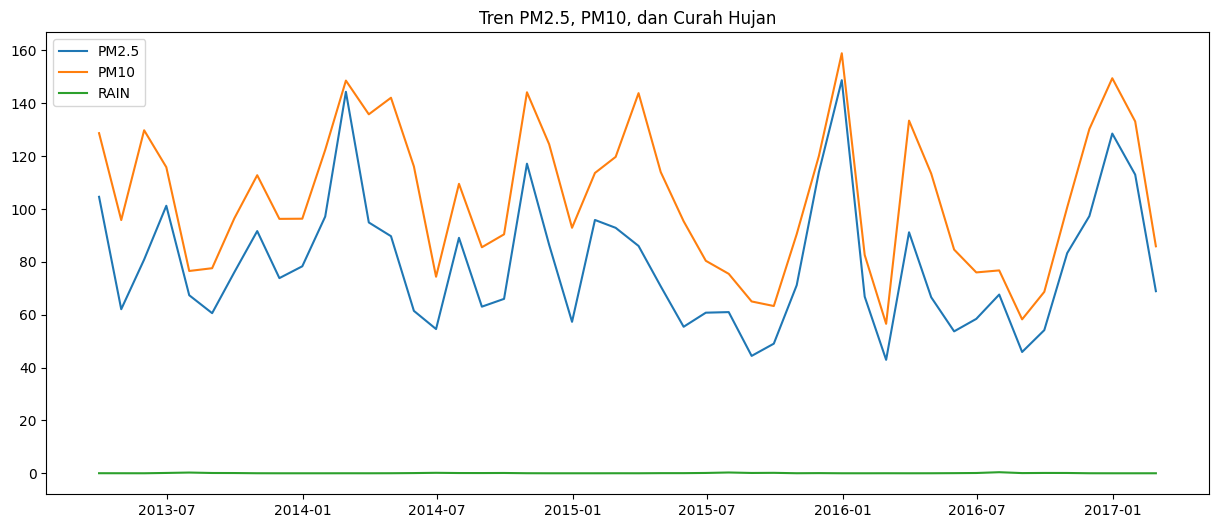

In [455]:
plt.figure(figsize=(15,6))
plt.plot(air_polution['PM2.5'], label='PM2.5')
plt.plot(air_polution['PM10'], label='PM10')
plt.plot(air_polution['RAIN'], label='RAIN')

plt.title('Tren PM2.5, PM10, dan Curah Hujan')
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh curah hujan terhadap polusi udara (PM2.5 dan PM10)?

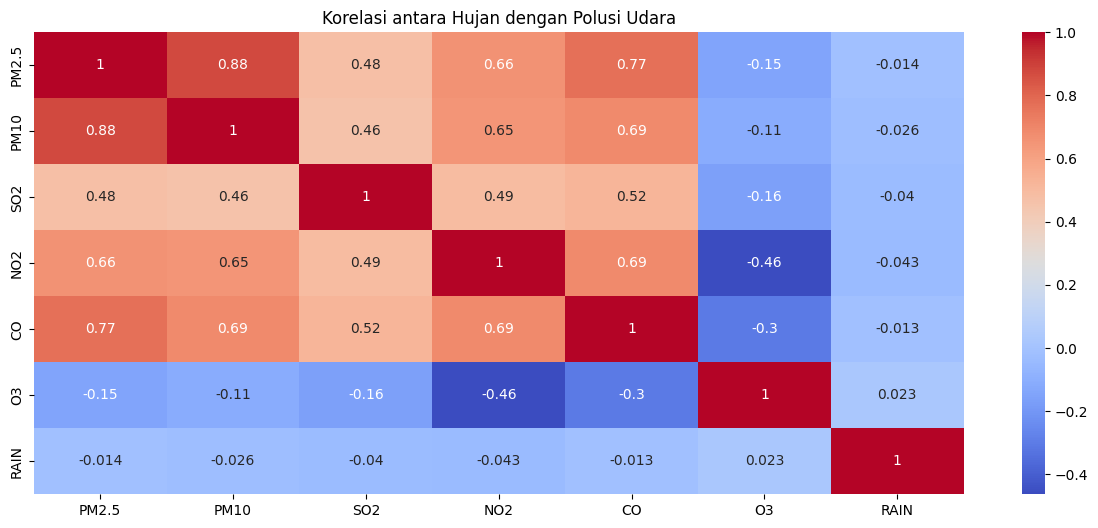

In [446]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Hujan dengan Polusi Udara')
plt.show()

### Pertanyaan 3: Bagaimana rata rata PM2.5, PM10, dan Curah Hujan?

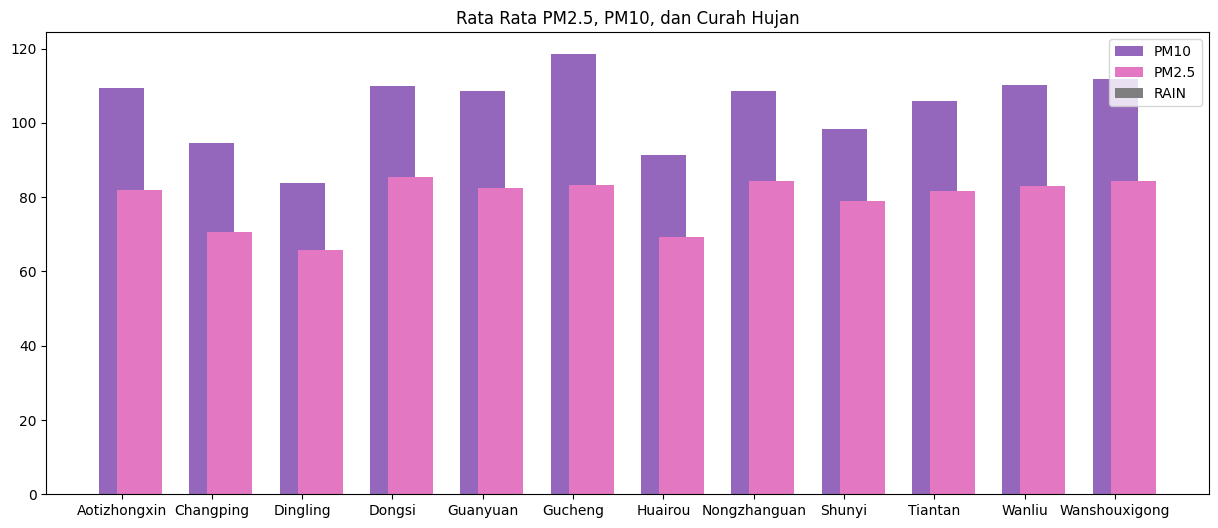

In [447]:
c = np.arange(len(most_polution['station']))
plt.figure(figsize=(15,6))
plt.bar(c, most_polution['PM10'], label='PM10', color='C4', width=0.5)
plt.bar(c+0.2, most_polution['PM2.5'], label='PM2.5', color='C6', width=0.5)
plt.bar(c+0.2, most_polution['RAIN'], label='RAIN', color='C7', width=0.5)
plt.xticks(c, most_polution['station'])
plt.legend()
plt.title('Rata Rata PM2.5, PM10, dan Curah Hujan')
plt.show()

### Pertanyaan 4: Wilayah mana yang mempunyai tingkat polusi udara (PM2.5) paling tinggi?

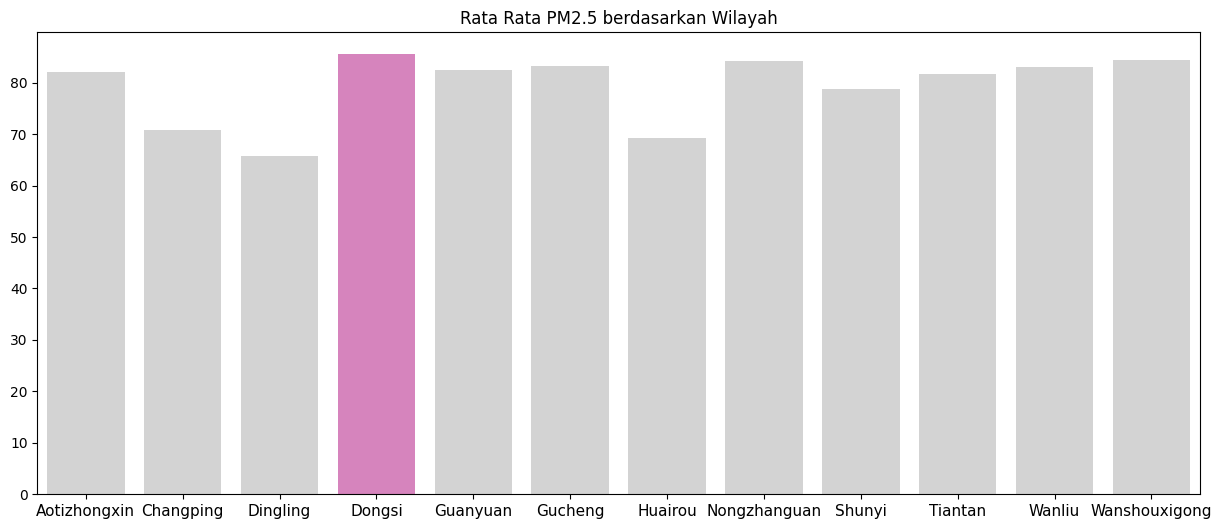

In [449]:
c = np.arange(len(most_polution['station']))

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "C6", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(15,6))
sns.barplot(y="PM2.5", x="station", data=most_polution.sort_values(by="station"), hue="station", legend=False, palette=colors)
plt.title("Rata Rata PM2.5 berdasarkan Wilayah")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=11)
plt.show()

**Insight:**
- Rata rata polusi udara tidak jauh berbeda antara wilayah
- Hujan mempunyai korelasi negatif sangat rendah terhadap polusi udara
- PM2.5 dan PM10 mempunyai korelasi positif yang tinggi

## Analisis Lanjutan (Opsional)

Menambahkan latitude dan longitude ke dalam dataframe untuk menentukan titik lokasi station

In [450]:
lat = [39.982056, 40.2161, 40.2944, 39.9292472, 39.9385, 39.9123, 40.3243, 39.9350, 40.1269, 39.8822, 39.9702, 39.9086]
lon = [116.411233, 116.2347, 116.2167, 116.4177314, 116.3511, 116.1699, 116.6318, 116.4556, 116.6564, 116.4104, 116.3105, 116.3443]

station_most = most_polution
station_most['lat'] = lat
station_most['lon'] = lon
station_most = station_most.sort_values(by='PM2.5', ascending=False).reset_index(drop=True)

Membuat fungsi untuk menentukan warna dan kualitas udara

In [451]:
def get_color_and_quality(aqi):
    if aqi <= 50:
        return 'green', 'Good'
    elif aqi <= 100:
        return 'yellow', 'Moderate'
    elif aqi <= 150:
        return 'orange', 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'red', 'Unhealthy'
    elif aqi <= 300:
        return 'purple', 'Very Unhealthy'
    else:
        return 'maroon', 'Hazardous'


Menggunakan folium untuk menampilkan map, kemudian menggunakan circle marker untuk menandai sesuai latitude dan longitude

In [456]:
maps = folium.Map(location = [39.929986, 116.422867],zoom_start = 11)

for index, row in station_most.iterrows():
  if index == 0:
    dv = 2
  else:
    dv = index + 1
  rad = row['PM2.5']/dv

  folium.CircleMarker(
      location=[row['lat'], row['lon']],
      radius=rad,
      color=get_color_and_quality(row['PM2.5'])[0],
      fill=True,
      fill_color=get_color_and_quality(row['PM2.5'])[0],
      fill_opacity=0.9,
      tooltip=folium.Tooltip(f"Station: {row['station']}<br>PM2.5: {round(row['PM2.5'],2)}<br>{get_color_and_quality(row['PM2.5'])[1]}", permanent=False)
  ).add_to(maps)

maps

## Conclusion

- Tren hujan menunjukan nilai yang hampir 0 dan terjadi setiap bulan sedangkan tren PM2.5 dan PM10 cenderung selalu berubah setiap bulannya.
- Rata rata PM2.5, PM10, dan Hujan menunjukan nilai yang hampir sama di setiap wilayah.
- Pada data korelasi, Hujan menujukan korelasi negatif sangat rendah terhadap polusi udara dan bisa dikatakan tidak mempunyai pengaruh.
- Wilayah Dongsi mempunyai tingkat polusi udara paling tinggi pada rata rata polusi udara tahun 2013-2017.